Bienvenue dans ce projet portant sur la dataset "diabetes.csv" 

# **CONTEXTE**


> 
  **Le diabète est une maladie chronique qui affecte un grand nombre de personnes dans le monde**. La collecte et l'analyse de données sur cette maladie peuvent aider les professionnels de la santé à mieux comprendre les facteurs de risque et les symptômes, et à développer des méthodes de traitement plus efficaces.
> 
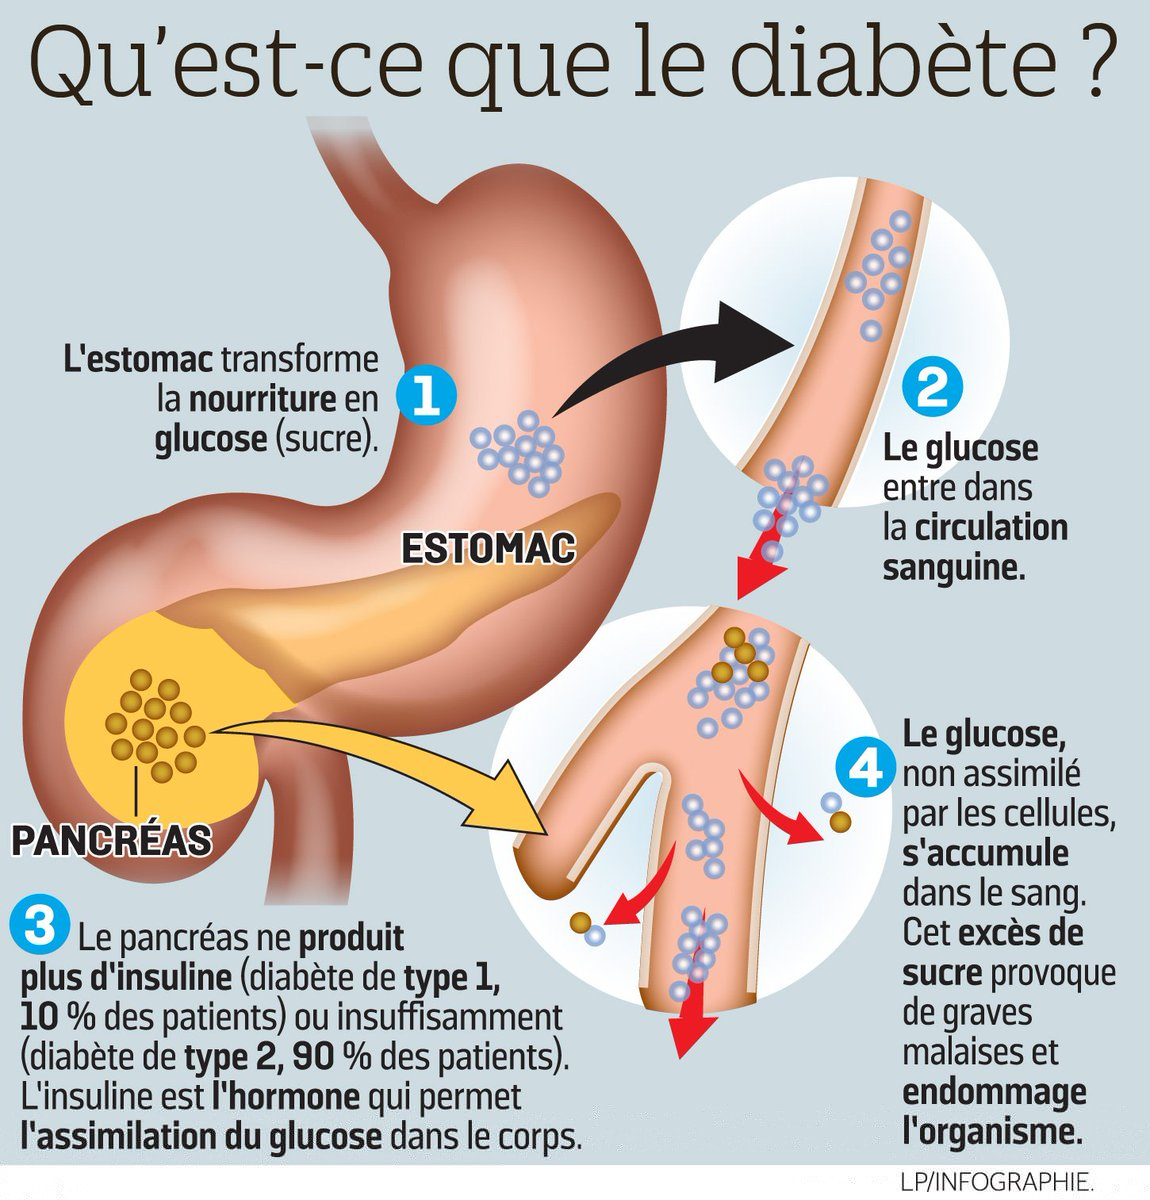

Cet ensemble de données provient à l'origine de l'Institut national du diabète et des troubles digestifs et rénaux
Maladies. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient souffre de diabète,
sur la base de certaines mesures de diagnostic incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées
sur la sélection de ces instances à partir d'une plus grande base de données. En particulier, tous les patients ici sont des femmes
avoir au moins 21 ans d'origine indienne Pima.2
À partir de l'ensemble de données dans le fichier (.csv), nous pouvons trouver plusieurs variables, certaines d'entre elles sont indépendantes
(plusieurs variables prédictives médicales) et une seule variable dépendante cible (résultat).

**Objectif** : Le but de ce projet est de créer un modèle de prédiction de diabète à partir du dataset "diabetes.csv". Nous allons utiliser différents modèles de machine learning pour prédire si un patient est atteint de diabète ou non, en utilisant les informations de diagnostic disponibles dans le dataset.

**Démarrons le projet propement dit**

Importer les bibliothèques nécessaires :


In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Charger le fichier CSV dans un DataFrame :


In [161]:
diabetes_data= pd.read_csv('diabetes.csv')

Il nous faut connaître la taille de notre data

In [162]:
diabetes_data.shape

(768, 9)

Vérifins s'il y a des valeurs manquantes dans notre data frame


In [163]:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Nous remarquons que notre data est au complet et donc pas de donnée manquante. La tâche nous sera donc un peu facile.

Analyser les statistiques descriptives des variables :


In [164]:
print(diabetes_data.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  


Nous allons débuter avec l'analyse de la donnée à notre disposition. 
Dans notre cas, nous allons chercher à connaître la correlation entre les variables en jeu.


In [165]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Portons nos regard sur les coefficients de corrélation d'une valeur importante :

1.   Entre  `Age` et `Pregnancies` : 0.544341
> 
  Cela nous montre qu'il y a une correlation forte entre ces deux données. Beaucoup  plus clairement expliqué dans les deux  graphiques ci-dessous.
2.   Entre  `Insulin` et `SkinThickness` : 0.436783
> 
  Cela nous montre qu'il y a une correlation modérée entre ces deux données.
3.   Entre  `Outcome` et `Glucose`    :   0.466581
> 
  Cela nous montre qu'il y a une correlation modérée entre ces deux données.

***Les deux derniers coefficients de corrélation etant indicatifs d'une corrélation modérée, nous tiendrons compte de ces donnees lors de notre prediction , ce qui ne sera pas le cas pour le premier coefficient , donc nous ignorerons une des deux données fortement corrélées . Nous choisirons donc `Pregnancies` au detriment de `Age` ***


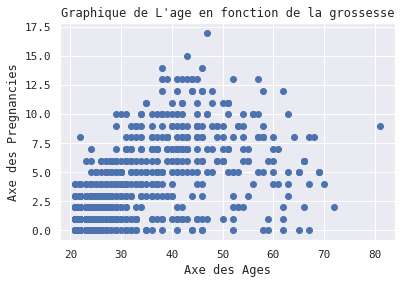

In [166]:
plt.scatter(diabetes_data.Age,diabetes_data.Pregnancies)
plt.title("Graphique de L'age en fonction de la grossesse")
plt.xlabel("Axe des Ages")
plt.ylabel("Axe des Pregnancies")
plt.show()

Explorons la corrélation entre les variables avec une heatmap


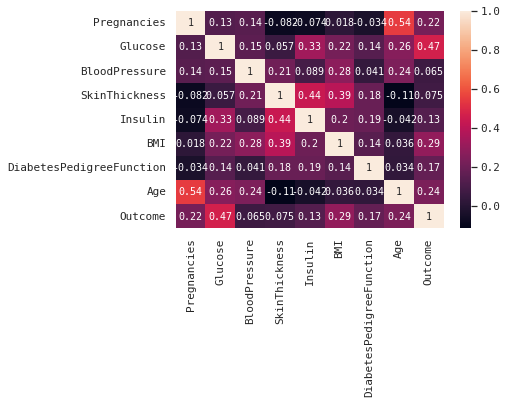

In [167]:
corr_matrix = diabetes_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

-


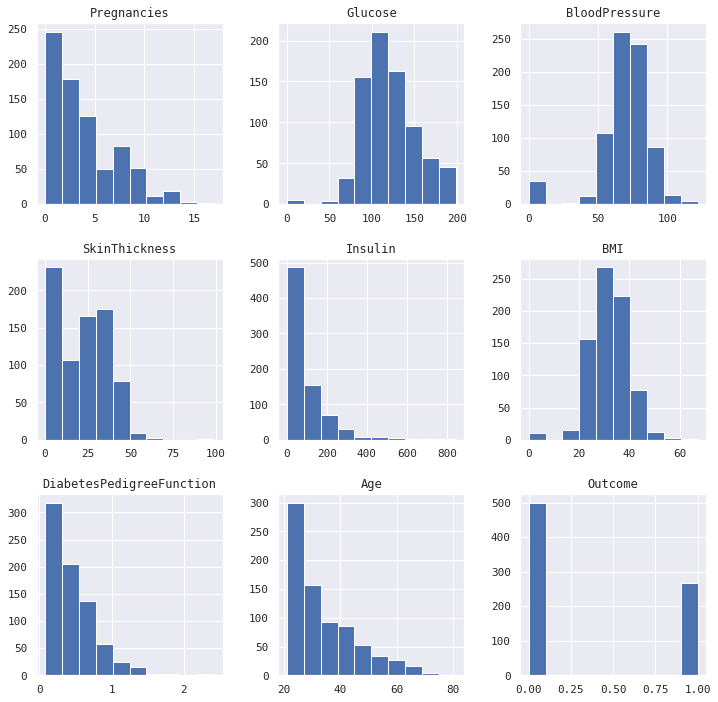

In [168]:
%matplotlib inline
plt.get_backend()
'module://ipykernel.pylab.backend_inline'
diabetes_data.hist(figsize=(12,12))
print("-")



**SELECTION DES CARACTÉRISTIQUES**





Nous vouslons utilisez la variables `["Outcome"]` comme notre variable dépendante





In [169]:
y=diabetes_data.Outcome

In [170]:
diabetes_data.drop(columns=["Outcome"],axis=1,inplace=True)

La ligne de code précédente permet de supprimer une colonne specifque ici `["Outcome"]` .Comme c'est une colonne alors `axis=1` , `inplace=True` permet de dire qu'on veut modifier notre data pas créer une nouvelle dataframe

In [171]:
X=diabetes_data.drop(columns=["Age"],axis=1)
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000


Separation des données en deux groupes : 80% des données pour l'entrainement et 20% pour la validation

In [172]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

**Modélisation**

*Choix du modele à utiliser*

---




>>> 
  La variable a predire est `Outcome` nous l'avions nommé y
>>>
  Verifions si elle est continue ou discrète.




In [173]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

On constate donc que la variable à predire est discrète c'est-à-dire, elle prend des valeurs discrètes ici {0,1} donc nous allons utiliser des modèles de classification.



**Nous utiliserons 3 modèles de classification**


---
>
1. `DecisionTreeClassifier`
2. `RandomForestClassifier`
3. `XGBClassifier`








1.**DecisionTreeClassifier**

In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import accuracy_score
model1=DecisionTreeClassifier(random_state=0)
model1.fit(train_X,train_y)
diabetes_preds1=model1.predict(test_X)
score1 = accuracy_score(diabetes_preds1, test_y)

**2.RandomForestClassifier**

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score
def get_score(max_leaf,train_X,train_y,test_X,test_y):
  model=RandomForestClassifier(max_leaf_nodes=max_leaf,random_state=0)
  model.fit(train_X,train_y)
  preds=model.predict(test_X)
  score=accuracy_score(test_y,preds)
  return score
for max_leaf in [5,50,500,2500,5000]:
  print("max_leaf : %d       score : %f "%(max_leaf,get_score(max_leaf,train_X,train_y,test_X,test_y)))

max_leaf : 5       score : 0.779221 
max_leaf : 50       score : 0.805195 
max_leaf : 500       score : 0.785714 
max_leaf : 2500       score : 0.785714 
max_leaf : 5000       score : 0.785714 


La ligne de code précédente est pour déterminer détermine le nombre maximal de feuilles dans chaque arbre de décision de la forêt aléatoire , pour eviter un overfitting et avoir une prediction plus précise.

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score
def get_score(n_estimate,train_X,train_y,test_X,test_y):
  model=RandomForestClassifier(n_estimators=n_estimate,random_state=0)
  model.fit(train_X,train_y)
  preds=model.predict(test_X)
  score=accuracy_score(test_y,preds)
  return score
for n_estimate in [5,50,500,2500,5000]:
  print("n_estimate : %d       score : %f "%(n_estimate,get_score(n_estimate,train_X,train_y,test_X,test_y)))

n_estimate : 5       score : 0.753247 
n_estimate : 50       score : 0.792208 
n_estimate : 500       score : 0.792208 
n_estimate : 2500       score : 0.779221 
n_estimate : 5000       score : 0.779221 


Cette ligne-ci fait la même chose que le code d'en haut pour le n_estimators 

En fait on pourrait faire la même chose pour toutes les variables , pour tous les paramètres de RandomForestClassifier juste pour determiner quelle valeur utiliser pour un parametre donné pour avoir une meilleure prédiction 

In [177]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=50,max_leaf_nodes=50,random_state=0)
model2.fit(train_X,train_y)
diabetes_preds2=model2.predict(test_X)
score2= accuracy_score(diabetes_preds2, test_y)

3.**XGBClassifier**

In [178]:
from xgboost import XGBClassifier
model3=XGBClassifier(n_estimators=50,max_leaf_nodes=50,random_state=0)
model3.fit(train_X,train_y)
diabetes_preds3=model3.predict(test_X)
score3 = accuracy_score(diabetes_preds3, test_y)

[17:12:46] WARNING: ../src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.



# **Comparer les performances des modèles**

In [179]:
print("Accuracy du modèle de décision tree:",score1*100)
print("Accuracy du modèle de random forest:",score2*100)
print("Accuracy du modèle de XGBoost:", score3*100)

Accuracy du modèle de décision tree: 72.72727272727273
Accuracy du modèle de random forest: 79.87012987012987
Accuracy du modèle de XGBoost: 77.92207792207793


# Conclusion


*Après avoir entraîné les trois modèles sur l'ensemble d'apprentissage et évalué leurs performances sur l'ensemble de test, nous avons constaté que le modèle XGBoost avait la meilleure accuracy score avec un score de 83.12%. Cela signifie que ce modèle est capable de prédire correctement si une personne est diabétique ou non dans environ 83% des cas.*

### MERCI DE NOUS AVOIR SUIVIE






